<a href="https://colab.research.google.com/github/stb2145/cig/blob/master/Lesson_6_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 6: Data Analysis**

**Learning Goals**
- Have some fun exploring some small datasets! (30 min)

## Stock Market Data
Read in some stock market data from Google finance

In [ ]:
!curl -L -o goog.csv http://tinyurl.com/rces-goog
!curl -L -o aapl.csv http://tinyurl.com/rces-aapl-csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   950    0   950    0     0   4112      0 --:--:-- --:--:-- --:--:--  4130
100  1628    0  1628    0     0   6052      0 --:--:-- --:--:-- --:--:--  6052
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   902    0   902    0     0   5337      0 --:--:-- --:--:-- --:--:--  5337
100  1628    0  1628    0     0   8099      0 --:--:-- --:--:-- --:--:--  8099


In [ ]:
! head goog.csv

<html lang=en><meta charset=utf-8><meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width"><title>Error 404 (Not Found)!!1</title><style nonce="smJITwjtGQgwSfJPzDFp1w">*{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{color:#222;text-align:unset;margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px;}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}pre{white-space:pre-wrap;}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/images/branding/googlelogo/2x/googlelogo_color_150x54dp.png) n

In [ ]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
goog = pd.read_csv('goog.csv')
goog.head()

,"<html lang=en><meta charset=utf-8><meta name=viewport content=""initial-scale=1",minimum-scale=1,"width=device-width""><title>Error 404 (Not Found)!!1</title><style nonce=""smJITwjtGQgwSfJPzDFp1w"">*{margin:0;padding:0}html",code{font:15px/22px arial,"sans-serif}html{background:#fff;color:#222;padding:15px}body{color:#222;text-align:unset;margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px;}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}pre{white-space:pre-wrap;}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/images/branding/googlelogo/2x/googlelogo_color_150x54dp.png) no-repeat 0% 0%/100% 100%;-moz-border-image:url(//www.google.com/images/branding/googlelogo/2x/googlelogo_color_150x54dp.png) 0}}@media only screen and (-webkit-min-device-pixel-ratio:2){#logo{background:url(//www.google.com/images/branding/googlelogo/2x/googlelogo_color_150x54dp.png) no-repeat;-webkit-background-size:100% 100%}}#logo{display:inline-block;height:54px;width:150px}</style><div id=""af-error-container""><a href=//www.google.com><span id=logo aria-label=Google role=img></span></a><p><b>404.</b> <ins>That’s an error.</ins><p>The requested URL was not found on this server. <ins>That’s all we know.</ins></div>"


## Temperature Data

We download some timeseries data from the [Berkeley Earth(http://berkeleyearth.org/) surface temperature dataset. This is timeseries data from various locations around earth. Let's get our local temperatures.



In [ ]:
! curl -o nyc_temp.txt http://berkeleyearth.lbl.gov/auto/Local/TAVG/Text/40.99N-74.56W-TAVG-Trend.txt


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  322k  100  322k    0     0   449k      0 --:--:-- --:--:-- --:--:--  449k


> If we examine this data, we see it is NOT a well formated CSV file. Loading it will be a bit painful, but Pandas makes the job retatively easy.

In [ ]:
! head -72 nyc_temp.txt | tail -8

% values are available.
% 
%                  Monthly          Annual          Five-year        Ten-year        Twenty-year
% Year, Month,  Anomaly, Unc.,   Anomaly, Unc.,   Anomaly, Unc.,   Anomaly, Unc.,   Anomaly, Unc.
 
  1743     4    -2.959  1.881       NaN    NaN       NaN    NaN       NaN    NaN       NaN    NaN
  1743     5    -0.467  1.278       NaN    NaN       NaN    NaN       NaN    NaN       NaN    NaN
  1743     6       NaN    NaN       NaN    NaN       NaN    NaN       NaN    NaN       NaN    NaN


In [ ]:
! head -30 nyc_temp.txt

% This file contains an extracted local summary of land-surface 
% temperature results produced by the Berkeley Earth averaging 
% method for the location: 
% 
%    40.99 N, 74.56 W
% 
% The Berkeley Earth method takes temperature observations from a large 
% collection of weather monitoring stations and produces an estimate of 
% the underlying global temperature field across all of the Earth's 
% land areas.  Once this temperature field has been generated, it is 
% possible to estimate the temperature evolution of individual locations 
% simply by sampling the field at the locaiton in question.  This 
% file contains such a local estimate.
% 
% Temperatures are in Celsius and reported as anomalies relative to the 
% Jan 1951-Dec 1980 average.  Uncertainties represent the 95% confidence 
% interval for statistical noise and spatial undersampling effects.  Such 
% uncertainties are expected to account for the effects of random 
% noise as well as random biases affecting station trends 

In [ ]:
##### http://berkeleyearth.lbl.gov/locations/40.99N-74.56W
# http://berkeleyearth.lbl.gov/auto/Local/TAVG/Text/40.99N-74.56W-TAVG-Trend.txt


#temp = pd.read_csv('nyc_temp.txt')

col_names = ['year', 'month', 'monthly_anom'] #+ 10*[]
temp = pd.read_csv('nyc_temp.txt',
                   header=None, usecols=[0, 1, 2], names=col_names,
                   delim_whitespace=True, comment='%')

temp.head()

,year,month,monthly_anom
0,1743,4,-2.959
1,1743,5,-0.467
2,1743,6,NaN
3,1743,7,0.084
4,1743,8,NaN


In [ ]:
temp

,year,month,monthly_anom
0,1743,4,-2.959
1,1743,5,-0.467
2,1743,6,NaN
3,1743,7,0.084
4,1743,8,NaN
...,...,...,...
3328,2020,8,1.656
3329,2020,9,0.580
3330,2020,10,1.033
3331,2020,11,2.503


> We have year and month, we need a day

In [ ]:
#first let's drop monthly_anom column
date_df = temp.drop('monthly_anom', axis=1)
date_df['day'] = 1

In [ ]:
#now create a datetime index to be our new index
date_index = pd.DatetimeIndex(pd.to_datetime(date_df))

In [ ]:
date_index

DatetimeIndex(['1743-04-01', '1743-05-01', '1743-06-01', '1743-07-01',
               '1743-08-01', '1743-09-01', '1743-10-01', '1743-11-01',
               '1743-12-01', '1744-01-01',
               ...
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', length=3333, freq=None)

In [ ]:
#now set the new index to be our date_index that we just created
temp = temp.set_index(date_index).drop(['year', 'month'], axis=1)
temp.head()

,monthly_anom
1743-04-01,-2.959
1743-05-01,-0.467
1743-06-01,NaN
1743-07-01,0.084
1743-08-01,NaN


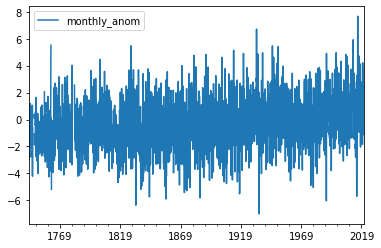

In [ ]:
temp.plot();

> Pandas can do both time-based resampling and operation over fixed-length rolling windows. These are very similar but distinct; see discussion in [Pandas docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html#windowing-functions).

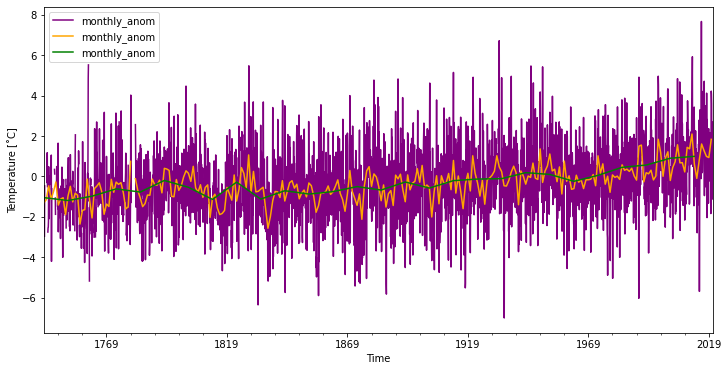

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
temp.plot(ax=ax, color='purple')
temp.resample('AS').mean().plot(ax=ax, color='orange')
temp.resample('10AS').mean().plot(ax=ax, color='green')
plt.xlabel('Time')
plt.ylabel('Temperature [˚C]');

> `resampling` aliases [link here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).
Resampling basically is like groupby where you group your items in a specified window size, then you tell python what operation you want done on your groups. Resampling does that for datetimeindex objects.

> The concept of rolling window calculation is most primarily used in signal processing and time series data. In very simple words we take a window size of our choosing, say 5 days at a time and perform some desired mathematical operation on it.

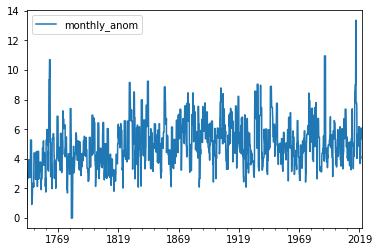

In [ ]:
# more advanced operation on rolling windows
def difference_max_min(data):
    return data.max() - data.min()

rw = temp.rolling('365D')
rw.apply(difference_max_min).plot();

To create a "climatology" (i.e. the average of all same months), we can use Pandas' [`groupby`](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) functionality.

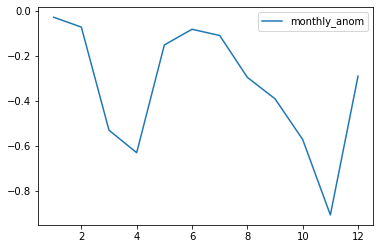

In [ ]:
# diurnal cycle has been removed!
temp.groupby(temp.index.month).mean().plot();

> Let's find the hottest years


In [ ]:
temp.groupby(temp.index.year).mean().sort_values('monthly_anom', ascending=False).head(10)

,monthly_anom
2012,2.097833
1998,1.837333
2020,1.834583
2016,1.604500
2006,1.567250
1991,1.550417
1990,1.498417
2010,1.439250
2011,1.364917
1949,1.361750


## Groupby
Now we will explore groupby's capabilities more in a public dataset from the City of New York: the [Rat Information Portal](https://data.cityofnewyork.us/Health/Rodent-Inspection/p937-wjvj)!

In [56]:
rats = pd.read_csv('https://raw.githubusercontent.com/rahim-hashim/Intro-Python-Biology/main/Rodent_Inspection_cut.csv',
                   parse_dates=['APPROVED_DATE', 'INSPECTION_DATE'])

In [58]:
rats.head()

,INSPECTION_TYPE,JOB_TICKET_OR_WORK_ORDER_ID,JOB_ID,JOB_PROGRESS,BBL,BORO_CODE,BLOCK,LOT,HOUSE_NUMBER,STREET_NAME,ZIP_CODE,X_COORD,Y_COORD,LATITUDE,LONGITUDE,BOROUGH,INSPECTION_DATE,RESULT,APPROVED_DATE,LOCATION
0,Initial,11362943,PC7165804,1,3080220003,3,8022,3,0,Avenue J,NaN,1009897.0,171130.0,0.0,0.0,Brooklyn,2016-05-31 16:20:00,Failed for Other R,2016-06-08 11:04:00,"(0.0, 0.0)"
1,Initial,11510828,PC7493225,1,5031230130,5,3123,130,0,ALEX CIRCLE,NaN,NaN,NaN,0.0,0.0,Staten Island,2010-12-10 11:00:00,Rat Activity,2010-12-13 10:12:00,"(0.0, 0.0)"
2,Initial,12328443,PC6737067,1,2025390132,2,2539,132,10,MAJ WM DEEGAN BLVD,NaN,1003704.0,240136.0,0.0,0.0,Bronx,2017-09-12 14:45:00,Passed,2017-09-14 14:41:00,"(0.0, 0.0)"
3,Initial,11362643,PC7466087,1,5002210035,5,221,35,0,Roe Street,NaN,950510.0,169320.0,0.0,0.0,Staten Island,2016-06-02 15:08:00,Passed,2016-06-07 14:35:00,"(0.0, 0.0)"
4,Initial,13126767,PC7562340,1,1018790041,1,1879,41,NaN,NaN,10025.0,NaN,NaN,NaN,NaN,Manhattan,2020-01-27 12:50:00,Rat Activity,2020-01-28 10:52:00,NaN
